In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import xlrd
import time
import statsmodels.api as sm

In [17]:
best_models = pd.read_pickle("./best_models_all.pkl")
best_models

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
bic,88.8893,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.095916 1 550.362977 2 532.44...,117.533,128.136,65034.3,0.999909
aic,53.7501,<statsmodels.regression.linear_model.Regressio...,13,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 570.400000 1 548.500000 2 533.00...,113.46,128.775,40512,0.999879
adj_rsquare,88.8893,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.095916 1 550.362977 2 532.44...,117.533,128.136,65034.3,0.999909


In [18]:
model = best_models.loc["bic"]

In [19]:
wrapper = model.model

In [20]:
model = wrapper.model

In [21]:
X = model.exog
print(X)

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 9.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 3.000e+01 1.000e+01 0.000e+00 3.000e+02
  9.000e+02 3.000e+03]
 [1.000e+00 0.000e+00 0.000e+00 1.000e+02 1.000e+01 0.000e+00 1.000e+03
  1.000e+04 1.000e+04]
 [1.000e+00 0.000e+00 0.000e+00 1.500e+02 9.000e+00 0.000e+00 1.350e+03
  2.250e+04 1.215e+04]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 3.000e+01 1.000e+01 3.000e+01 3.000e+02
  9.000e+02 3.000e+03]
 [1.000e+00 1.000e+00 0.000e+00 1.000e+02 1.000e+01 1.000e+02 1.000e+03
  1.000e+04 1.000e+04]
 [1.000e+00 1.000e+00 0.000e+00 1.500e+02 1.000e+01 1.500e+02 1.500e+03
  2.250e+04 1.500e+04]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 9.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+01 0.000e+00 0.000e+00
  0.000e+00 3.000e+03]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+0

In [22]:
dt = wrapper.get_prediction(X).summary_frame(alpha= 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])).head())


            0           1           2
0  569.095916  562.273425  575.918408
1  550.362977  544.121921  556.604032
2  532.441107  525.195161  539.687053
3  488.100000  480.762144  495.437856
4  333.540697  326.566016  340.515378


In [27]:
wrapper.get_prediction(X).results

AttributeError: 'PredictionResults' object has no attribute 'results'

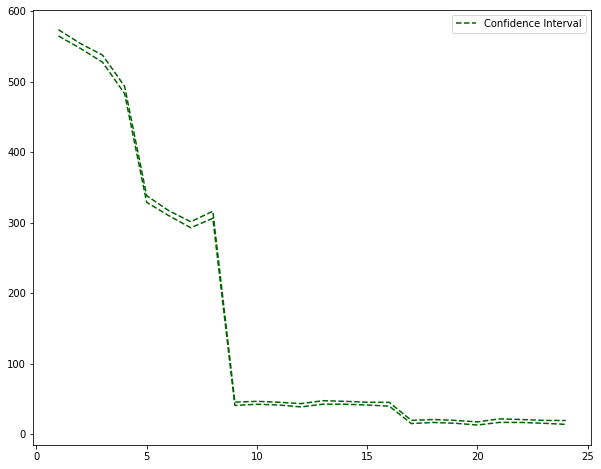

In [23]:
ym_ci_lower = dt['mean_ci_lower']
ym_ci_upper = dt['mean_ci_upper']
_ = plt.figure(num = 2, figsize=(10, 8))
_ = plt.plot(np.linspace(start=1,stop=len(ym_ci_lower), num=len(ym_ci_lower)), ym_ci_lower, color = "darkgreen", linestyle = "--",
         label = "Confidence Interval")
_ = plt.plot(np.linspace(start=1, stop=len(ym_ci_lower), num=len(ym_ci_lower)), ym_ci_upper, color = "darkgreen", linestyle = "--")
_ = plt.legend()
plt.show()

### La parte da copiare è questa qua sotto

In [1]:
import funzioni as fn

In [34]:
model_row = best_models.loc["bic"]
wrapper = model_row.model
model = wrapper.model

response= model.endog
#prediction = model.pr e
#model.predict()
prediction = wrapper.predict(model.exog)

In [37]:
len(response)

24

In [38]:
len(prediction)

24

AttributeError: 'Line2D' object has no property 'ax'

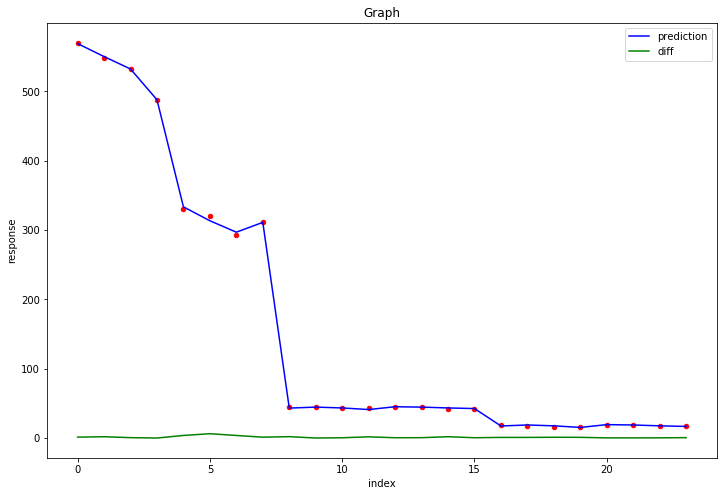

In [39]:
fn.plot_response_over_prediction(response, prediction, title="Graph", figsize=(12, 8), wrapper=wrapper)